<a href="https://colab.research.google.com/github/Askani-Priyanka/Data-Mining/blob/main/Simple_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Convolutional Neural Network (CNN)

# 1. Pre-requisites

### 1.1 Install required library


In [ ]:
#install torchvision
!pip install torchvision

### 1.2 Import necessary libraries

In [ ]:
#import necessary libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader
from collections import Counter
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from collections import Counter

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 2. Exploratory Data Analysis

### 2.1 Download the CIFAR10 data set and prepare training, testing, and validation sets

In [ ]:
#Load CIFAR10 data set
full_data = datasets.cifar10.load_data()

#split data into training and testing
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

#split testing into validation
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=5000, random_state=42
)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


### 2.2 Visualizing Training Set Example

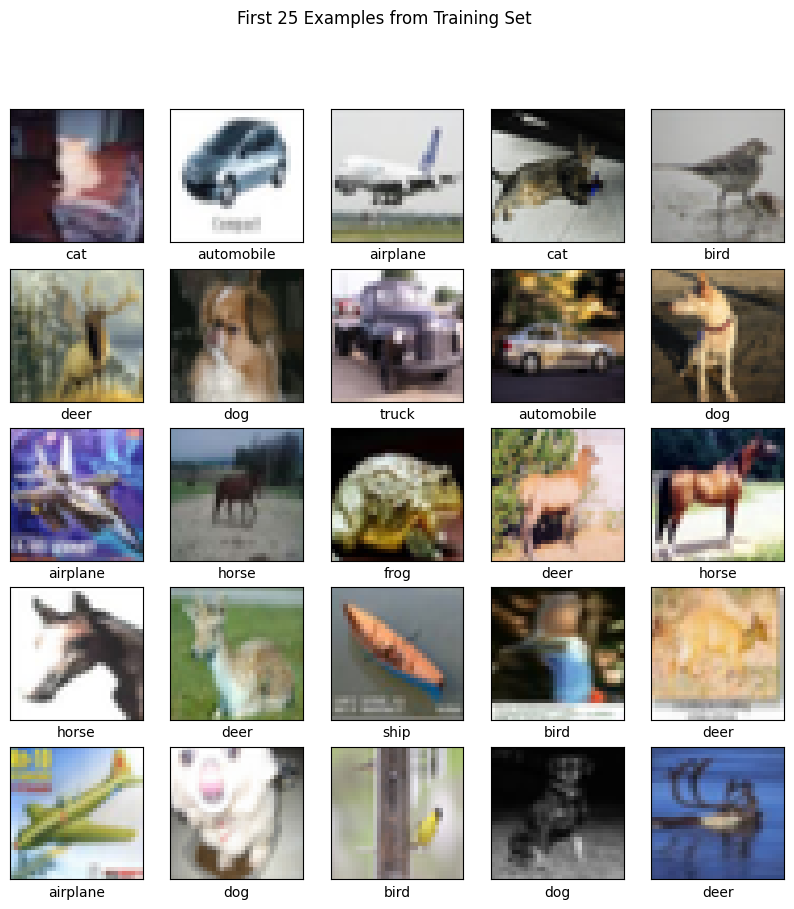

In [ ]:
#define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

#plot first 25 training images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
    plt.suptitle("First 25 Examples from Training Set")
plt.show()

### 2.3 Class Counts and Distributions

Training Set: 45000
Validation Set: 5000
Test Set: 10000
Class distributions:
         Class  Train Count  Validation Count  Test Count
0    airplane         4524               476        1000
1  automobile         4513               487        1000
2        bird         4473               527        1000
3         cat         4477               523        1000
4        deer         4514               486        1000
5         dog         4496               504        1000
6        frog         4515               485        1000
7       horse         4491               509        1000
8        ship         4497               503        1000
9       truck         4500               500        1000


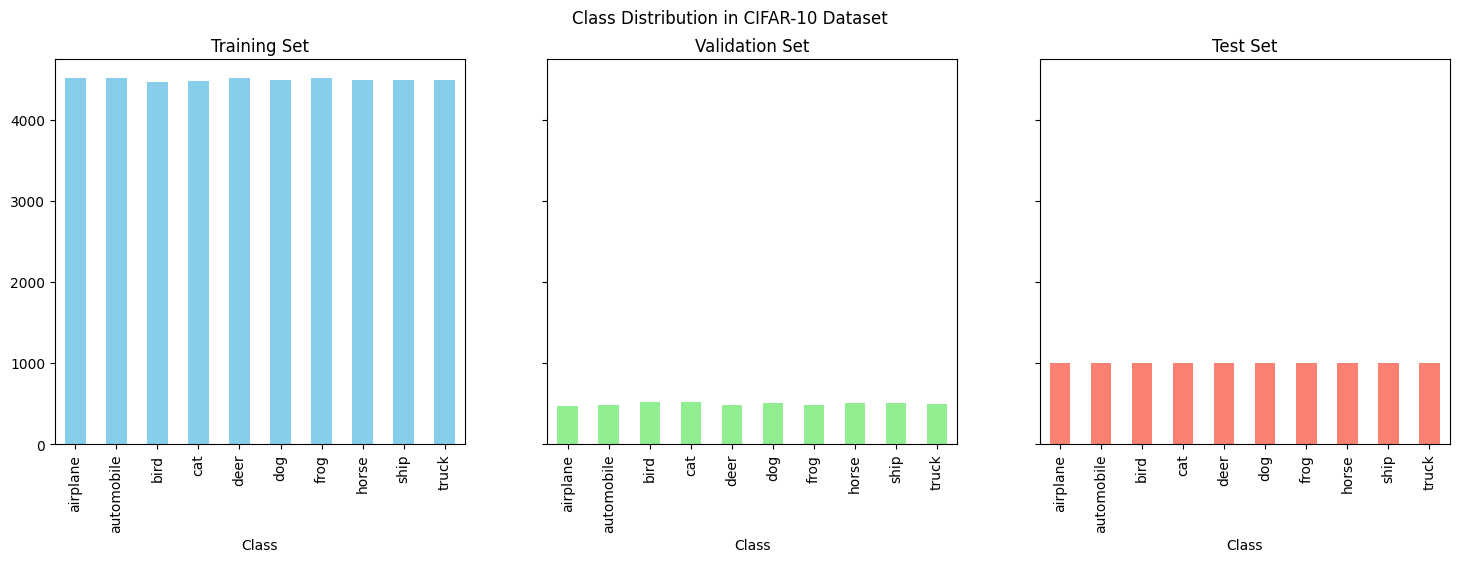

In [ ]:
#define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training Set: {len(train_images)}")
print(f"Validation Set: {len(val_images)}")
print(f"Test Set: {len(test_images)}")

#flatten the labels array
train_labels = train_labels.flatten()
val_labels = val_labels.flatten()
test_labels = test_labels.flatten()

#count occurrences of each class in the training, validation, and test sets
train_counts = Counter(train_labels)
val_counts = Counter(val_labels)
test_counts = Counter(test_labels)

#counts data frame
df = pd.DataFrame({
    "Class": class_names,
    "Train Count": [train_counts[i] for i in range(10)],
    "Validation Count": [val_counts[i] for i in range(10)],
    "Test Count": [test_counts[i] for i in range(10)]
})

print("Class distributions:\n", df)

#plot class distributions
fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
df.plot(x='Class', y='Train Count', kind='bar', ax=ax[0], color='skyblue', legend=False)
df.plot(x='Class', y='Validation Count', kind='bar', ax=ax[1], color='lightgreen', legend=False)
df.plot(x='Class', y='Test Count', kind='bar', ax=ax[2], color='salmon', legend=False)
ax[0].set_title("Training Set")
ax[1].set_title("Validation Set")
ax[2].set_title("Test Set")
plt.suptitle("Class Distribution in CIFAR-10 Dataset")
plt.show()


### 2.4 Data Statistics

In [ ]:
#Calculate mean and std for training set
train_images = train_images.astype(np.float32)

#Calculate mean and std along the color channels (axis (0, 1, 2) corresponds to height, width, and channels)
train_mean = train_images.mean(axis=(0, 1, 2))
train_std = train_images.std(axis=(0, 1, 2))

print(f"Training set mean: {train_mean}")
print(f"Training set std: {train_std}")

#Calculate mean and std for testing set
test_images = test_images.astype(np.float32)

#Calculate mean and std along the color channels (axis (0, 1, 2) corresponds to height, width, and channels)
test_mean = test_images.mean(axis=(0, 1, 2))
test_std = test_images.std(axis=(0, 1, 2))

print(f"Testing set mean: {test_mean}")
print(f"Testing set std: {test_std}")

#Calculate mean and std for testing set
val_images = val_images.astype(np.float32)

#Calculate mean and std along the color channels (axis (0, 1, 2) corresponds to height, width, and channels)
val_mean = val_images.mean(axis=(0, 1, 2))
val_std = val_images.std(axis=(0, 1, 2))

print(f"Validation set mean: {val_mean}")
print(f"Validation set std: {val_std}")

# Normalize the images (subtract mean and divide by std)
train_images_normalized = (train_images - train_mean) / train_std
test_images_normalized = (test_images - train_mean) / train_std
val_images_normalized = (val_images - train_mean) / train_std


Training set mean: [0.49153447 0.48244926 0.44681755]
Training set std: [0.24704863 0.24342586 0.26163355]
Testing set mean: [0.49421427 0.4851322  0.45040992]
Testing set std: [0.24665268 0.24289216 0.2615922 ]
Validation set mean: [0.4901745  0.47954518 0.44394472]
Validation set std: [0.24688244 0.24399833 0.26116344]


### 2.5 Dimensionality Reduction

Explained variance ratio for the first 50 components: 0.8383345603942871
Explained variance by each component: [0.26891178 0.11374267 0.07167861 0.03862141 0.03602655 0.02972228
 0.02816313 0.0215151  0.02105552 0.01495436 0.01314699 0.01126241
 0.01112443 0.01048208 0.00944863 0.00832008 0.00769257 0.00744626
 0.00661494 0.00646897 0.0060537  0.0059667  0.00521147 0.00510888
 0.0050735  0.00491524 0.00465751 0.00458864 0.00418375 0.00404372
 0.00381547 0.00345554 0.0033449  0.00318667 0.00316148 0.00294339
 0.00273605 0.00271238 0.00266009 0.00260864 0.0025249  0.00235325
 0.00234737 0.00228163 0.00217979 0.00212063 0.0019903  0.0019597
 0.00189171 0.00185871]


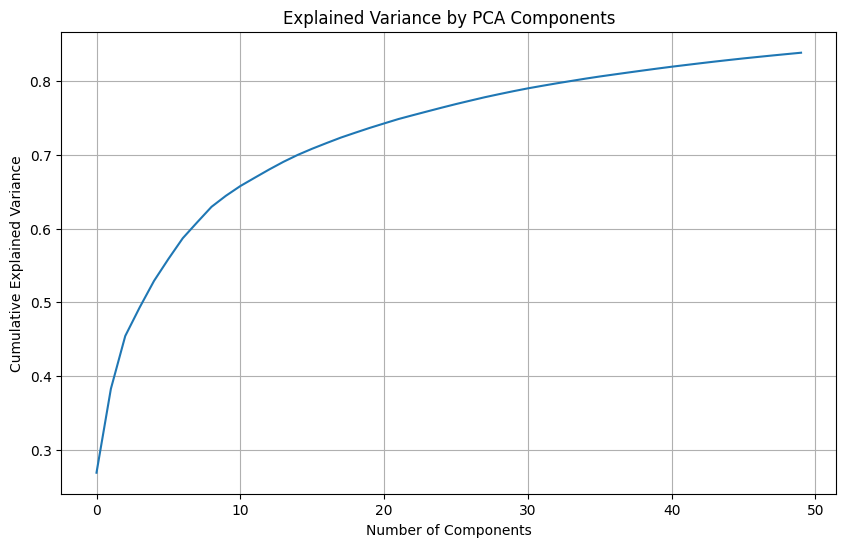

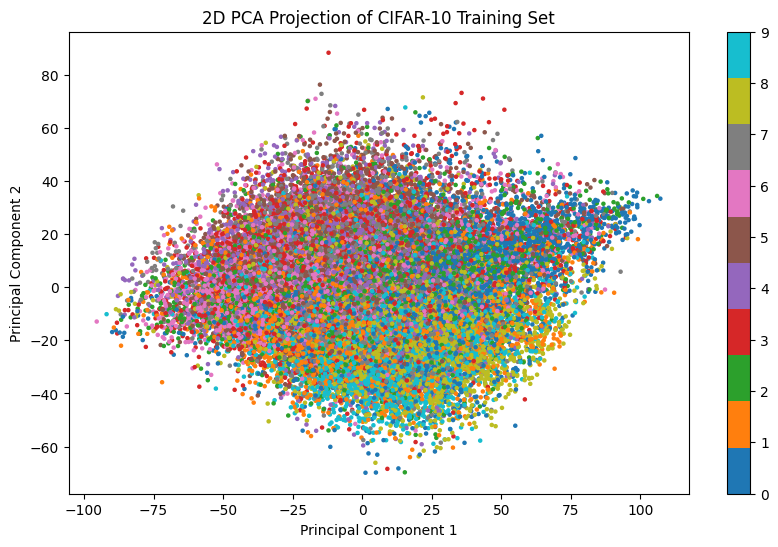

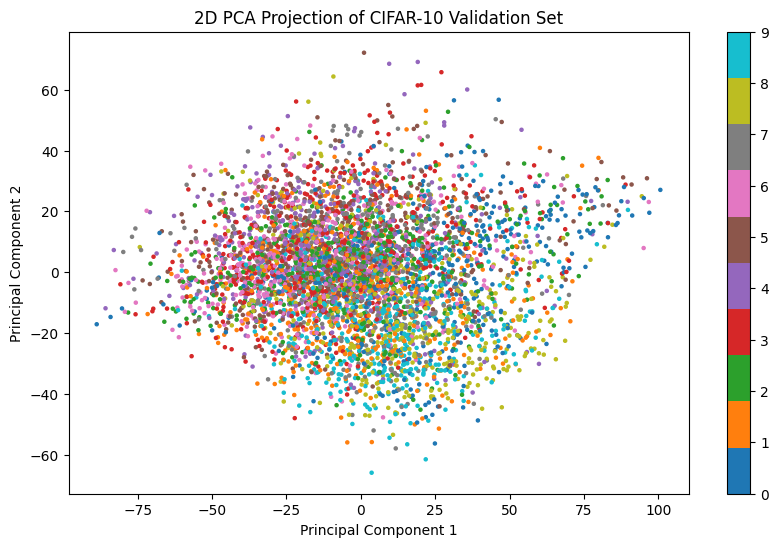

In [ ]:
train_images_flattened = train_images.reshape(train_images.shape[0], -1)
val_images_flattened = val_images.reshape(val_images.shape[0], -1)
test_images_flattened = test_images.reshape(test_images.shape[0], -1)

# Normalize the images (scale to [0, 1])
train_images_flattened = train_images_flattened / 255.0
val_images_flattened = val_images_flattened / 255.0
test_images_flattened = test_images_flattened / 255.0

# Standardize the data: zero mean, unit variance (important for PCA)
scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_images_flattened)
val_images_scaled = scaler.transform(val_images_flattened)
test_images_scaled = scaler.transform(test_images_flattened)

# Apply PCA to reduce the number of dimensions (e.g., down to 50 components)
pca = PCA(n_components=50)
train_images_pca = pca.fit_transform(train_images_scaled)

# Explained variance ratio (proportion of variance explained by each of the selected components)
print(f'Explained variance ratio for the first 50 components: {np.sum(pca.explained_variance_ratio_)}')
print(f'Explained variance by each component: {pca.explained_variance_ratio_}')

# Visualize the explained variance ratio of the components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Optionally: Visualize the 2D projection of the first two PCA components
# We'll project both the training set and validation set to the first two components for visualization

train_images_2d = pca.transform(train_images_scaled)[:, :2]  # First two principal components
val_images_2d = pca.transform(val_images_scaled)[:, :2]    # First two principal components

# Plot the 2D projection of the training set
plt.figure(figsize=(10, 6))
plt.scatter(train_images_2d[:, 0], train_images_2d[:, 1], c=train_labels.flatten(), cmap='tab10', s=5)
plt.colorbar()
plt.title("2D PCA Projection of CIFAR-10 Training Set")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Plot the 2D projection of the validation set
plt.figure(figsize=(10, 6))
plt.scatter(val_images_2d[:, 0], val_images_2d[:, 1], c=val_labels.flatten(), cmap='tab10', s=5)
plt.colorbar()
plt.title("2D PCA Projection of CIFAR-10 Validation Set")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# 3. Model

### 3.1 Model parameters
The code below defines the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 3.2 Check Model Architecture

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

### 3.3 Add Dense Layer

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Here's the complete architecture of the model:

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.



### 3.4 Train the Model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=80,
                    validation_data=(test_images, test_labels))

Epoch 1/80
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3279 - loss: 1.8025 - val_accuracy: 0.5329 - val_loss: 1.2852
Epoch 2/80
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.5542 - loss: 1.2509 - val_accuracy: 0.6029 - val_loss: 1.1130
Epoch 3/80
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6264 - loss: 1.0725 - val_accuracy: 0.6257 - val_loss: 1.0568
Epoch 4/80
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6601 - loss: 0.9696 - val_accuracy: 0.6638 - val_loss: 0.9631
Epoch 5/80
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6861 - loss: 0.8962 - val_accuracy: 0.6605 - val_loss: 0.9715
Epoch 6/80
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7079 - loss: 0.8399 - val_accuracy: 0.6652 - val_loss: 0.9545
Epoch 7/80
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7295 - loss: 0.7796 - val_accuracy: 0.6915 - val_loss: 0.8976
Epoch 8/80
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7449 - loss: 0.7289

### 3.5 Evaluate the Model

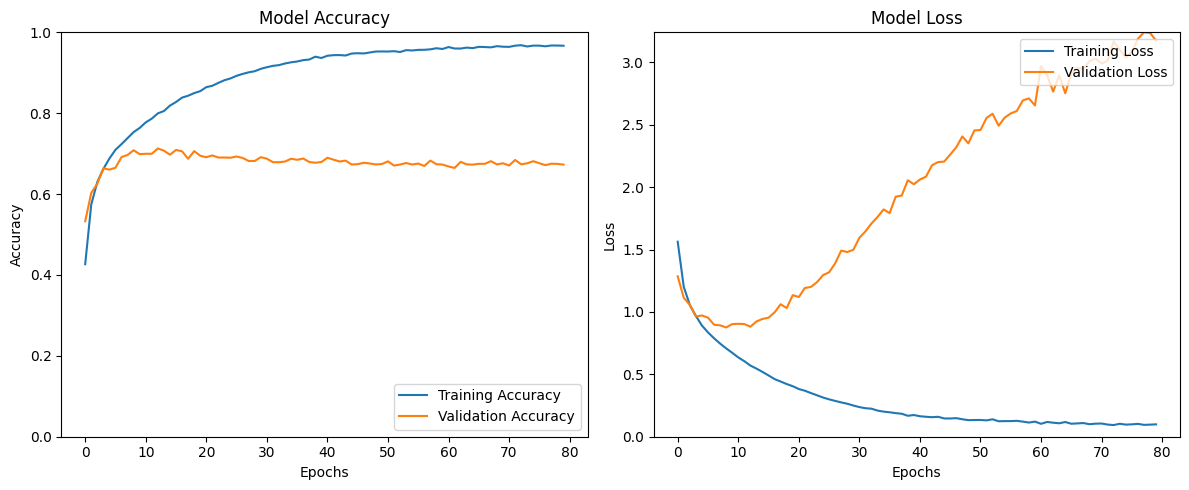

1407/1407 - 2s - 1ms/step - accuracy: 0.9728 - loss: 0.0796
Training Accuracy: 0.9728
313/313 - 1s - 2ms/step - accuracy: 0.6729 - loss: 3.1734
Test Accuracy: 0.6729
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test Precision: 0.6745
Test Recall: 0.6729
Test F1 Score: 0.6723

Test Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      1000
           1       0.82      0.79      0.80      1000
           2       0.62      0.49      0.55      1000
           3       0.49      0.49      0.49      1000
           4       0.63      0.59      0.61      1000
           5       0.52      0.60      0.55      1000
           6       0.76      0.74      0.75      1000
           7       0.67      0.73      0.70      1000
           8       0.79      0.80      0.80      1000
           9       0.75      0.81      0.77      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     1

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np

# Plot model accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Model Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, max(max(history.history['loss']), max(history.history['val_loss']))])
plt.title('Model Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Evaluate training accuracy
train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=2)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate test accuracy
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np

# Generate predictions for the test dataset
y_test_pred = model.predict(test_images)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)  # Convert predictions to class labels

# Use test_labels directly if it is already a 1D array
y_test_true = test_labels

# Calculate precision, recall, and F1 score for the test dataset
test_precision = precision_score(y_test_true, y_test_pred_classes, average='weighted')
test_recall = recall_score(y_test_true, y_test_pred_classes, average='weighted')
test_f1 = f1_score(y_test_true, y_test_pred_classes, average='weighted')

print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

# Display a full classification report for the test dataset
print("\nTest Classification Report:")
print(classification_report(y_test_true, y_test_pred_classes))

# Generate predictions for the training dataset
y_train_pred = model.predict(train_images)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)  # Convert predictions to class labels

# Use train_labels directly if it is already a 1D array
y_train_true = train_labels

# Calculate precision, recall, and F1 score for the training dataset
train_precision = precision_score(y_train_true, y_train_pred_classes, average='weighted')
train_recall = recall_score(y_train_true, y_train_pred_classes, average='weighted')
train_f1 = f1_score(y_train_true, y_train_pred_classes, average='weighted')

print(f"\nTraining Precision: {train_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")

# Display a full classification report for the training dataset
print("\nTraining Classification Report:")
print(classification_report(y_train_true, y_train_pred_classes))




# 4. Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


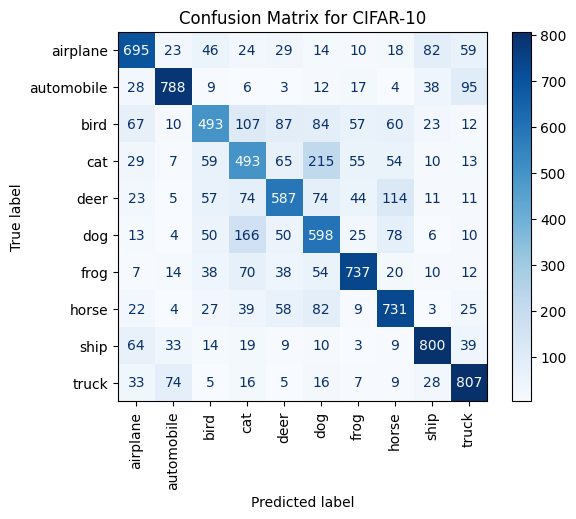

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Make predictions on the test set
predictions = model.predict(test_images)

# Convert logits to class predictions
predicted_classes = np.argmax(predictions, axis=1)

# Flatten the test_labels array
true_classes = test_labels.flatten()

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix for CIFAR-10")
plt.show()
